In [1]:
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from geopy.point import Point
from geopy.distance import great_circle
from math import radians, degrees, sin, cos, atan2, sqrt
import networkx as nx
import matplotlib.cm as cm
from pyproj import Transformer

In [4]:
def midpoint(lat1, lon1, lat2, lon2):
    # Converta as latitudes e longitudes de graus para radianos
    lat1, lon1 = radians(lat1), radians(lon1)
    lat2, lon2 = radians(lat2), radians(lon2)

    # Converta para coordenadas cartesianas
    x1, y1, z1 = cos(lat1) * cos(lon1), cos(lat1) * sin(lon1), sin(lat1)
    x2, y2, z2 = cos(lat2) * cos(lon2), cos(lat2) * sin(lon2), sin(lat2)

    # Calcule a média das coordenadas cartesianas
    x_mid = (x1 + x2) / 2
    y_mid = (y1 + y2) / 2
    z_mid = (z1 + z2) / 2

    # Converta de volta para coordenadas geográficas
    lon_mid = atan2(y_mid, x_mid)
    hyp = sqrt(x_mid * x_mid + y_mid * y_mid)
    lat_mid = atan2(z_mid, hyp)

    # Converta de radianos para graus
    return degrees(lat_mid), degrees(lon_mid)

In [5]:
def haversine_distance(lat1, lon1, lat2, lon2):
    # Constante: raio da Terra em quilômetros
    R = 6371.0

    # Converter graus em radianos
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Diferença de coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Fórmula de Haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Distância em quilômetros
    distance = R * c*1000
    return distance

In [2]:
data = np.loadtxt("./output/resultados_2.dat")
nodes = np.loadtxt("./file/nodes_2.txt")
edges = np.loadtxt("./file/edges_2.txt")
solution = np.loadtxt("./output/solution_2.dat")
cost = edges[:,3]
capacidade = edges[:,2]

In [4]:
data

array([[ 0.00000e+00, -1.03862e+03,  1.22566e+03, ...,  2.29600e+01,
         0.00000e+00, -4.05100e+01],
       [-4.99890e+02,  0.00000e+00, -8.81000e+01, ..., -5.99000e+00,
         0.00000e+00, -2.82500e+01],
       [ 1.73400e+01,  4.78700e+01,  0.00000e+00, ..., -8.70000e-01,
         0.00000e+00,  1.22400e+01],
       ...,
       [ 3.43000e+00,  1.02000e+00,  1.84200e+01, ...,  0.00000e+00,
         0.00000e+00,  2.06400e+01],
       [ 1.43550e+02,  2.42200e+01, -2.14370e+02, ...,  2.39200e+01,
         0.00000e+00, -8.84000e+01],
       [-1.05100e+02,  1.71020e+02, -1.22190e+02, ...,  2.29700e+01,
         0.00000e+00,  0.00000e+00]])

In [52]:
BETA = 4
ALPHA = 0.03
def BPR(x,capacidade,cost):
    return cost*(1 + ALPHA*np.power(x/capacidade,BETA))

In [98]:
tempo_total = []
for i in range(edges.shape[0]):
    fluxo = data[i]
    fluxo = solution - fluxo
    fluxo = fluxo[np.arange(len(fluxo)) != i]
    tempo_total += list( BPR(fluxo,capacidade,cost))
tempo_total = np.array(tempo_total)

In [81]:
distance_edges = []
for node1,node2 in edges[:,:2].astype(int):
    point1 = Point(nodes[node1][1], nodes[node1][2])
    point2 = Point(nodes[node2][1], nodes[node2][2])

    center = midpoint(nodes[node1][1], nodes[node1][2], nodes[node2][1], nodes[node2][2])
    distance_edges.append([node1,node2,center[0],center[1]])
distance_edges = np.array(distance_edges)

In [95]:
t = tempo_total
dist = np.array([haversine_distance(distance_edges[2][2],distance_edges[2][3],i[2],i[3]) for i in distance_edges])
bins = 800
dt = (np.max(t) - np.min(t))/bins
bars = np.arange(np.min(t),np.max(t)+dt,dt)
hist = np.array([0]*len(bars))

for dado in t:
    for j in range(len(bars)):
        if(dado<bars[j]):
            break
    hist[j] += 1
bars = bars[hist > 0]
hist = hist[hist > 0]
hist = hist/np.sum(hist)

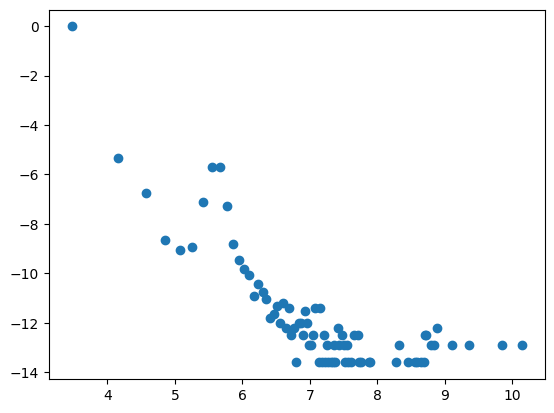

In [87]:
plt.scatter(np.log(bars),np.log(hist))
plt.show()

In [44]:
w = np.log(np.array(list(solution -data[191]) + list(solution))+0.01 )

In [27]:
np.abs(solution).astype(int)

array([2790, 2848, 2234, 2323,  539,  975,  767,  367, 2387, 1065, 1847,
       2136, 2460,  794,  942, 2465, 2734,  976, 1303, 2027, 1989,  918,
       1770, 1211, 1819,  135, 1930, 1008, 1968, 1298, 1887,  902, 2820,
       2474, 1671, 1272, 3020, 2080, 1909, 1113, 1647, 1857, 1653, 1716,
       1209,  369,  186,  189,  252,  665,  464,  631,  322,  538,  733,
        109, 1136, 1180,  331,  808,  893,  925,  610,  740,  454,  963,
        285,  167,  620,  245,  678,  136,   66, 2991,  947,  779, 2720,
        232,  501,  161,  922,  107, 2637, 1720, 2314, 1406, 1601,  958,
       1709,  914, 1115,  778, 4995,  872, 1435, 1639, 2857, 2152,  628,
       2270, 3151, 2116, 1054, 1784,  192, 2180, 1936,  181, 2700, 1185,
       1370, 2031, 2397, 2934, 1827,  920,  325,  109, 1054,  153,  249,
        109,  530,  679, 1234, 1217, 1615,  833,  361, 3362, 1791, 1361,
        323, 1489,  236, 1085, 1363,  766,  374,  444, 1731,  839, 1218,
        778,  325,  652,  114,  104,  631, 1411,  2

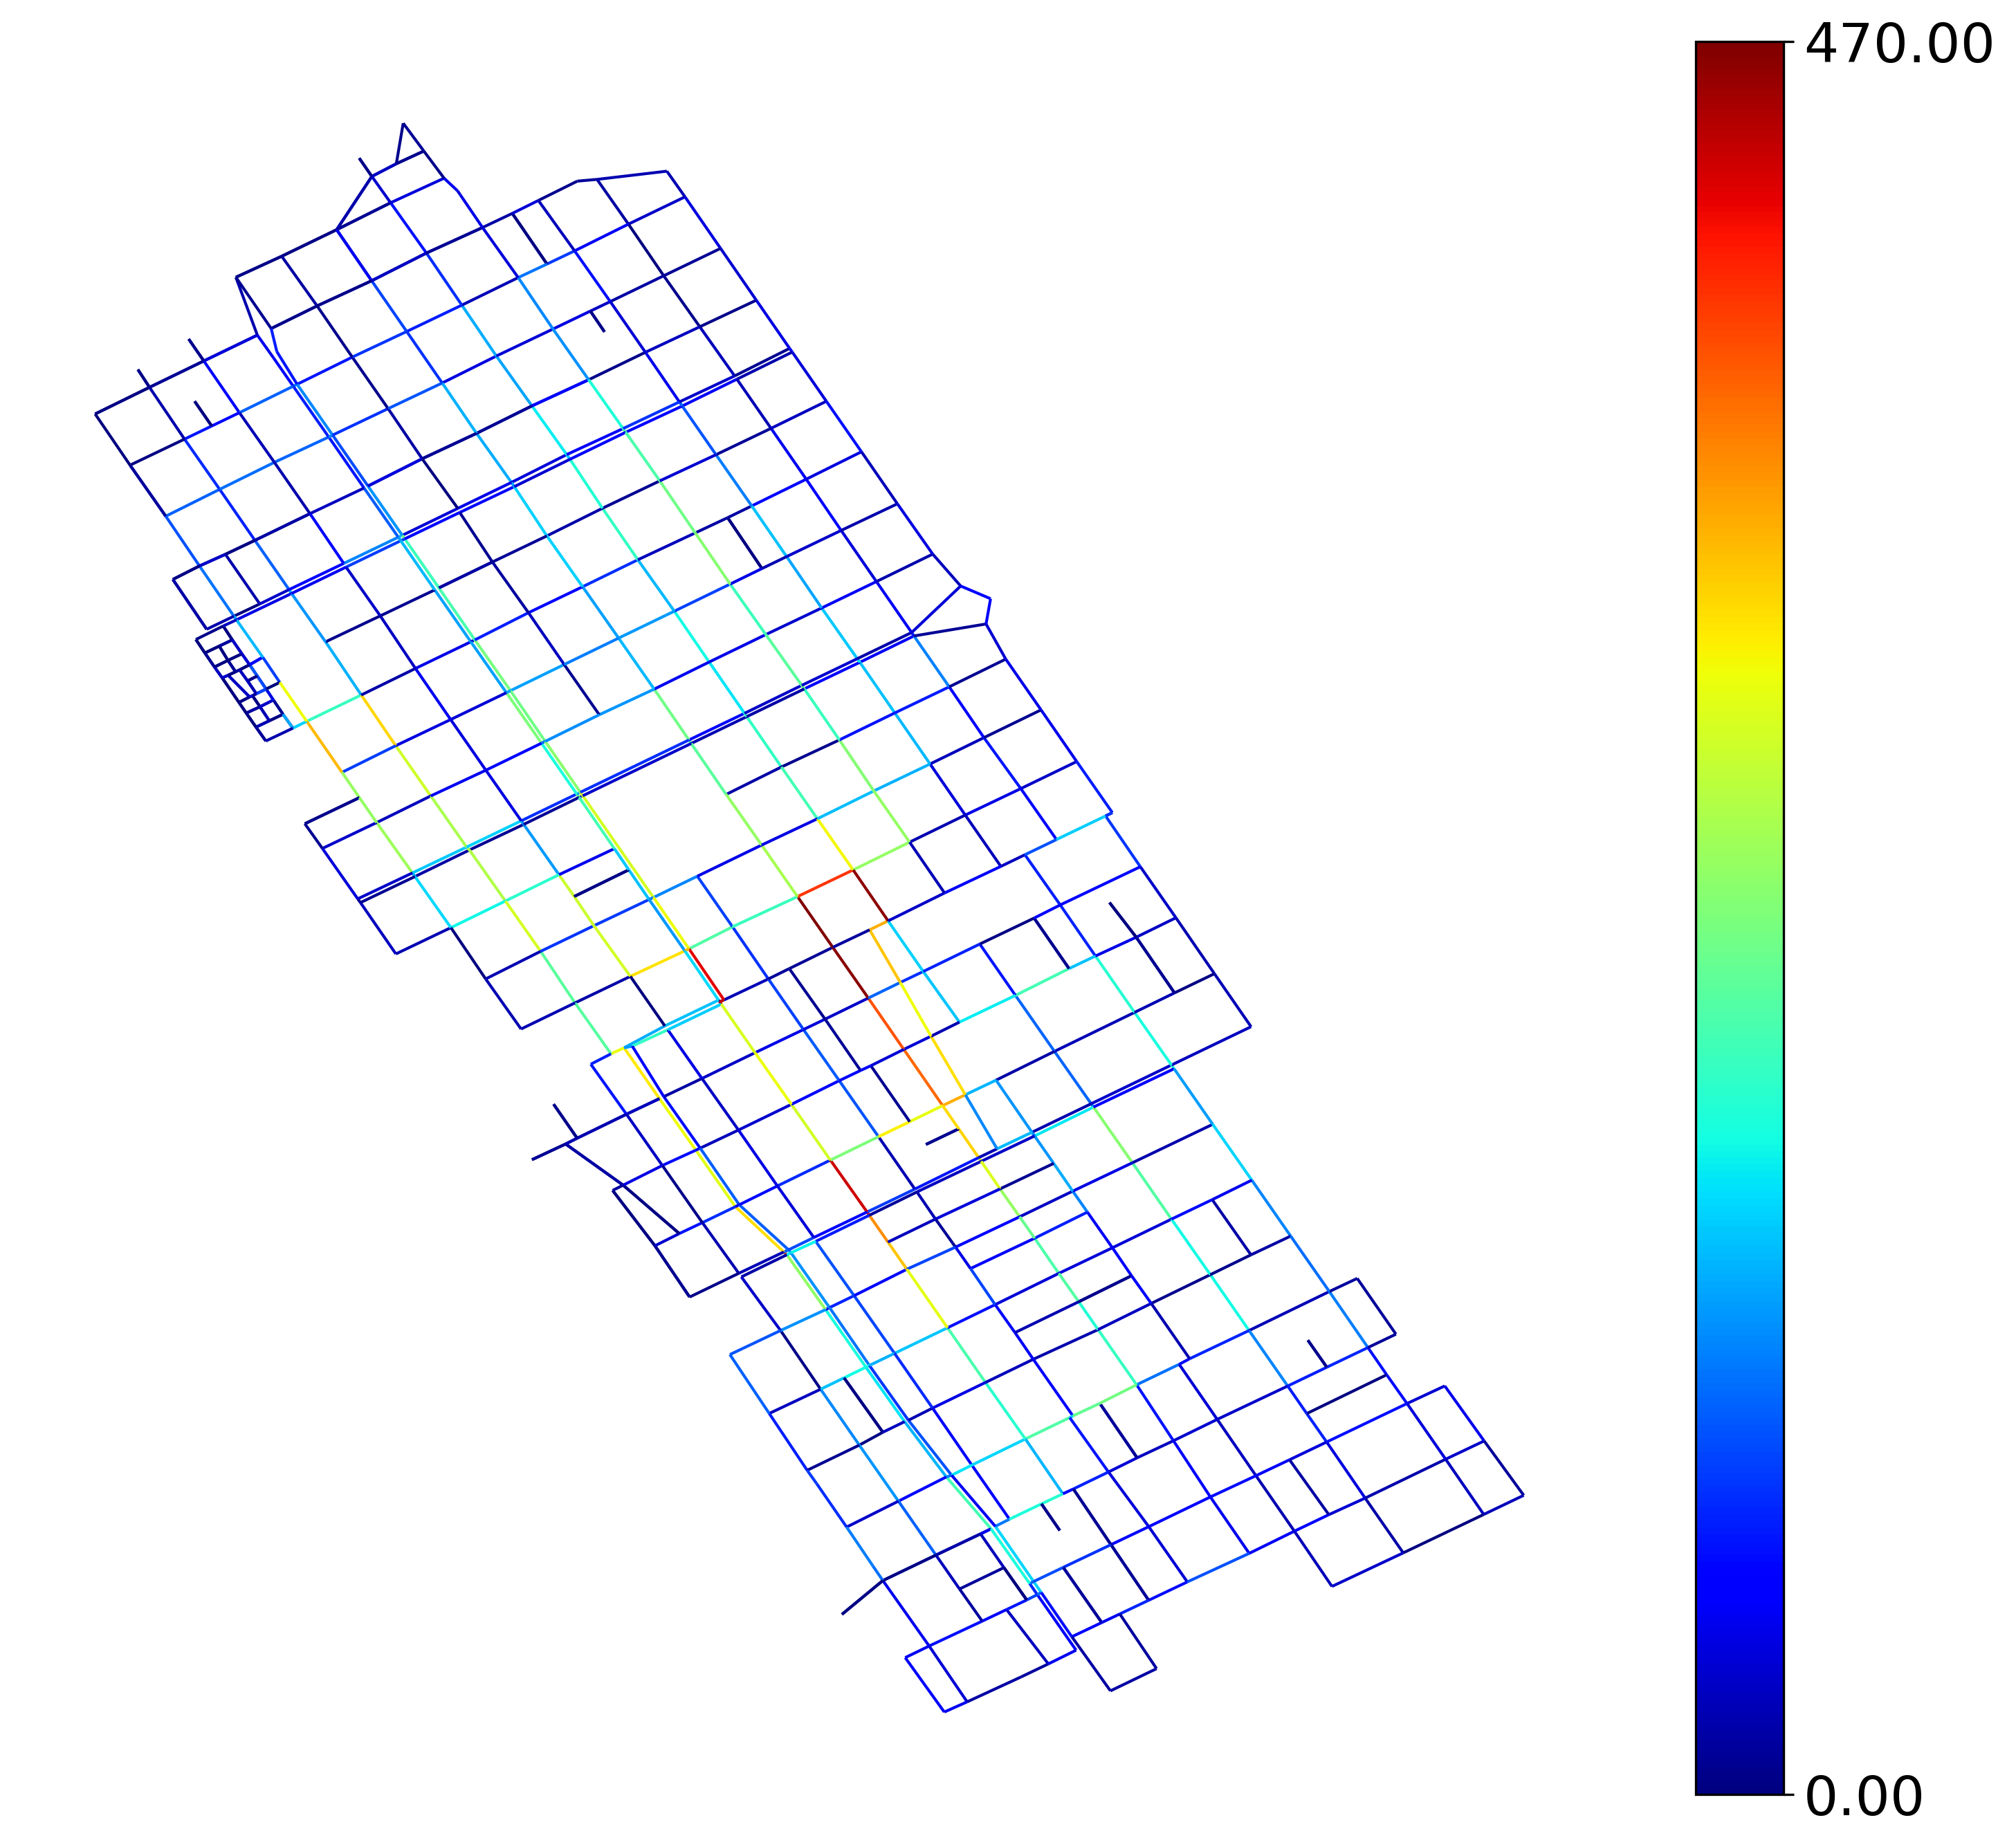

In [5]:
transformer = Transformer.from_crs("epsg:4326", "epsg:32633")
nos = np.array([[no[0], transformer.transform(no[1], no[2])[0], transformer.transform(no[1], no[2])[1]] for no in nodes])

# Criação do grafo
G = nx.DiGraph()

# Adicionando nós com posições baseadas nas coordenadas
for node in nos:
    G.add_node(int(node[0]), pos=(node[1], node[2]))

# Adicionando arestas
for i in edges:
    G.add_edge(int(i[0]), int(i[1]))

lig = 191  # Índice da ligação específica que será destacada
weights = solution.astype(int)
norm = plt.Normalize(np.min(weights), np.max(weights))
# Mapeando os pesos para cores usando o colormap 'viridis'
edge_colors = [cm.jet(norm(weight)) for weight in weights]
#edge_colors[lig] = 'black'

# Criando a lista de larguras de arestas
edge_widths = [1] * len(edges)  # Largura padrão de 1 para todas as arestas
#edge_widths[lig] = 5  # Aumentando a largura da aresta específica
# Obtendo as posições dos nós
pos = nx.get_node_attributes(G, 'pos')

plt.figure(figsize=(10, 9),dpi = 300)

for i, (u, v) in enumerate(G.edges()):
    if i != lig:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=edge_colors[i], width=edge_widths[i], arrows=False)

# Desenhando a aresta crimson
nx.draw_networkx_edges(G, pos, edgelist=[list(G.edges())[lig]], edge_color=edge_colors[lig], width=edge_widths[lig], arrows=False)

# Desenhando os nós (opcional, apenas se você quiser visualizar os nós também)
# nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=20)
plt.axis('off')
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='jet'), ax=plt.gca())
cbar.ax.tick_params(labelsize=19)
cbar.set_ticks([norm.vmin, norm.vmax])
cbar.set_ticklabels([f'{norm.vmin:.2f}', f'{norm.vmax:.2f}'])
plt.tight_layout()
plt.savefig("./resultado_aldeota_data.png",transparent = True)
plt.show()

In [40]:
list(np.array([solution.astype(int),(solution - data[lig]).astype(int),capacidade]).T)

[array([122., 243., 168.]),
 array([ 166.,   65., 2796.]),
 array([ 106.,  227., 2644.]),
 array([  30.,   30., 3794.]),
 array([  52.,   52., 2806.]),
 array([ 89.,  75., 503.]),
 array([ 77.,  77., 560.]),
 array([ 18.,  14., 497.]),
 array([ 203.,  192., 2802.]),
 array([115., 115., 231.]),
 array([ 143.,  132., 2859.]),
 array([ 164.,  153., 2763.]),
 array([ 179.,  235., 2907.]),
 array([ 175.,  194., 1551.]),
 array([ 56.,  56., 190.]),
 array([ 247.,  303., 2779.]),
 array([389., 363., 165.]),
 array([  18.,   18., 2153.]),
 array([101., 101., 221.]),
 array([ 316.,  290., 2701.]),
 array([ 292.,  274., 2855.]),
 array([  80.,   77., 1561.]),
 array([ 301.,  283., 2609.]),
 array([ 55.,  55., 202.]),
 array([ 311.,  293., 2564.]),
 array([ 12.,  12., 775.]),
 array([ 138.,  138., 2014.]),
 array([299., 282., 304.]),
 array([  66.,  153., 2611.]),
 array([  24.,   24., 1797.]),
 array([ 101.,  188., 2848.]),
 array([ 57.,  62., 182.]),
 array([ 101.,  245., 2719.]),
 array([115.,

In [37]:
list(np.sort(weights)[::-1])

[337.07825821794614,
 336.7590443962798,
 330.7303335924819,
 326.8387709871054,
 294.69903722776587,
 252.3311930401483,
 233.8867959670136,
 205.8883783774418,
 76.27794612887455,
 64.28258466358864,
 63.437645643093184,
 63.41732996861267,
 51.37038913044392,
 29.20118271049358,
 27.223341639627282,
 24.503828136043587,
 23.96388368723211,
 22.682176710954728,
 18.518240766513955,
 15.375710191302403,
 13.4724965518824,
 13.144705678181465,
 11.798657062640176,
 11.318982668327292,
 11.030102361798924,
 10.908715742739602,
 10.387383121674056,
 9.409520633661117,
 9.406314793522993,
 9.122721088225932,
 8.948896953101647,
 8.45162796252352,
 8.381202765254692,
 8.283143946138129,
 8.044597047990772,
 7.584888160532216,
 7.21195937590204,
 7.199208083695857,
 6.575662266580255,
 6.160334590263377,
 5.357720218005149,
 4.637787390241661,
 4.392166250954007,
 4.149174921363074,
 4.101916889388024,
 4.078228641104659,
 3.787866195210758,
 3.7773636523548615,
 3.7578900704689535,
 3.7507

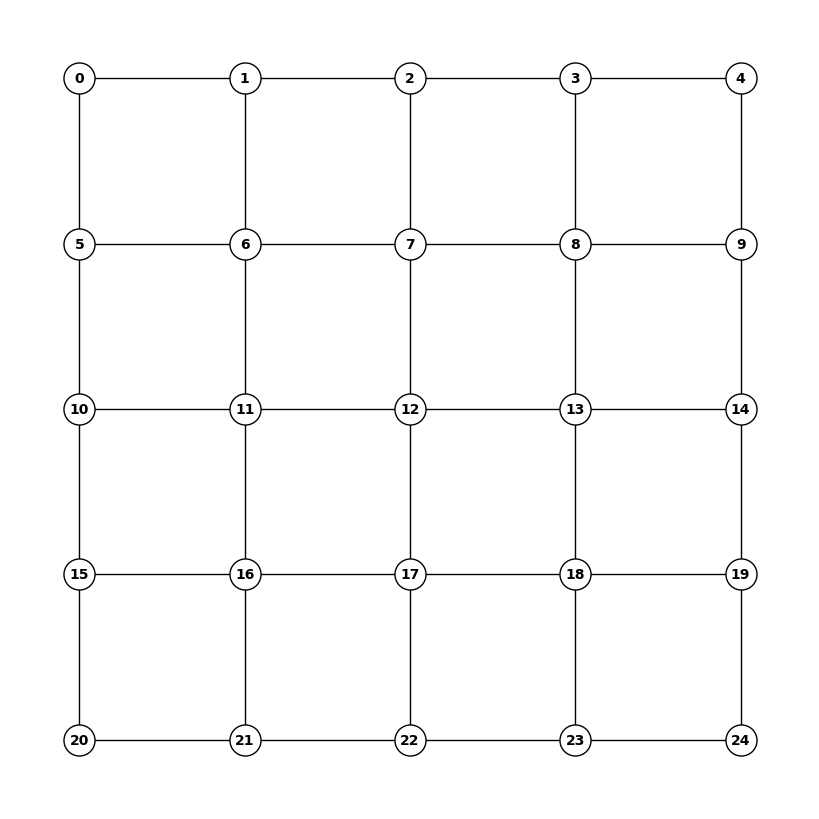

In [102]:
import networkx as nx
import matplotlib.pyplot as plt

# Criar uma rede quadrada 5x5
G = nx.grid_2d_graph(5, 5, create_using=nx.Graph)

# Convertendo nós para um formato único para rotulagem
G = nx.convert_node_labels_to_integers(G)

# Obtendo as posições dos nós em um layout de grade
pos = {i: (i % 5, 4 - i // 5) for i in G.nodes()}

# Desenhar a rede
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_color='white', node_size=500,edgecolors = 'black', font_size=10, font_color='black', font_weight='bold')
plt.show()


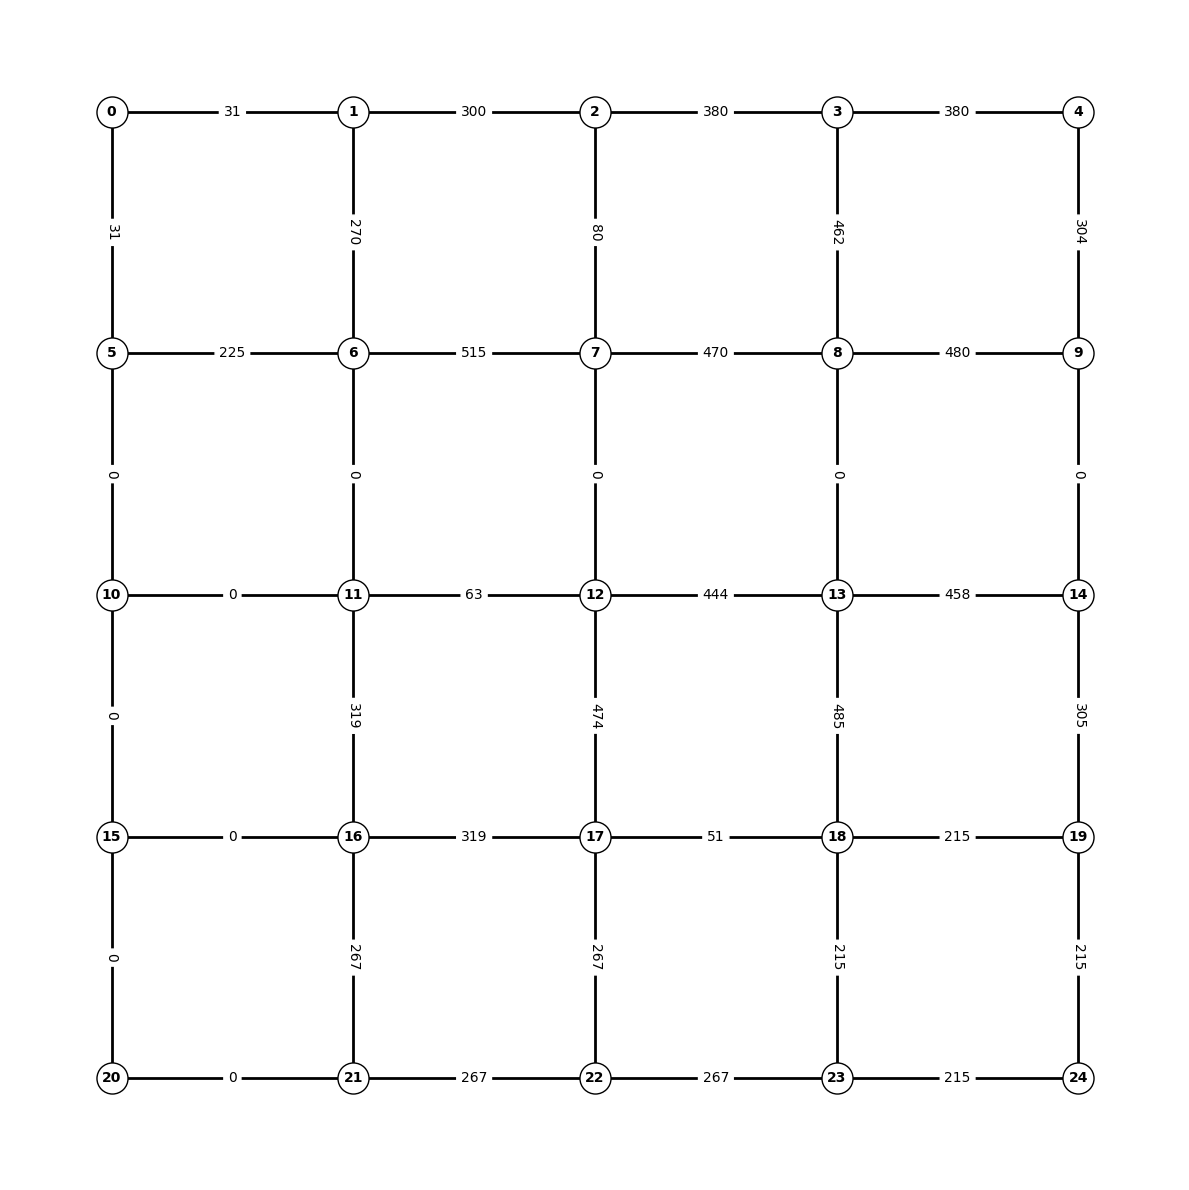

In [110]:
import networkx as nx
import matplotlib.pyplot as plt

# Criar uma rede quadrada 5x5
G = nx.grid_2d_graph(5, 5, create_using=nx.Graph)

# Convertendo nós para um formato único para rotulagem
G = nx.convert_node_labels_to_integers(G)

# Definindo pesos para as arestas conforme a imagem fornecida
weights = {
    (0, 1): 31, (1, 2): 300, (2, 3): 380, (3, 4): 380,
    (0, 5): 31, (1, 6): 270, (2, 7): 80, (3, 8): 462, (4, 9): 304,
    (5, 6): 225, (6, 7): 515, (7, 8): 470, (8, 9): 480, (9, 10): 304,
    (5, 11): 256, (6, 12): 490, (7, 13): 444, (8, 14): 458, (9, 15): 2,
    (11, 12): 63, (12, 13): 444, (13, 14): 458, (14, 15): 495,
    (11, 16): 319, (12, 17): 474, (13, 18): 485, (14, 19): 305,
    (16, 17): 319, (17, 18): 51, (18, 19): 215,
    (16, 21): 267, (17, 22): 267, (18, 23): 215, (19, 24): 215,
    (21, 22): 267, (22, 23): 267, (23, 24): 215
}
all_edges = set(G.edges())
for edge in all_edges:
    if edge not in weights:
        weights[edge] = 0
# Adicionar pesos às arestas no grafo
nx.set_edge_attributes(G, weights, 'weight')

# Obtendo as posições dos nós em um layout de grade
pos = {i: (i % 5, 4 - i // 5) for i in G.nodes()}

# Desenhar a rede
plt.figure(figsize=(12, 12))
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_nodes(G, pos, node_color='white', node_size=500, edgecolors='black')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_weight='bold')

# Adicionar rótulos de peso às arestas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.axis('off')
plt.tight_layout()
plt.show()


In [49]:
import pandas as pd
skewness = []
for i in data:
    df = pd.DataFrame({'valores': i})

    # Calcular a skewness
    skewness.append(df['valores'].skew())

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  3.,  3.,  1.,  2.,  5.,  7.,  2.,  4.,
         1.,  1.,  1.,  7.,  4.,  3.,  2.,  3.,  1.,  2.,  0.,  3.,  2.,
         2.,  2.,  4.,  2.,  3.,  2.,  1.,  3.,  4.,  1.,  3.,  6.,  1.,
         6.,  1.,  3.,  4.,  7.,  3.,  5.,  6.,  3.,  3.,  4.,  5.,  1.,
         8.,  6.,  6.,  7.,  7.,  6.,  5.,  6.,  8.,  1., 11.,  2.,  4.,
         1.,  4.,  3., 10.,  7., 10.,  6.,  4., 11., 10., 11., 12., 10.,
        15.,  5.,  9., 14., 13., 23., 15., 12., 14., 21., 21., 28., 16.,
        15., 13., 23., 15., 12., 18., 16., 12.,  6.,  9.,  9.,  8., 31.,
        11.,  9.,  8.,  7.,  8.,  5.,  3.,  4., 10., 12.,  4.,  3.,  2.,
         7.,  6.,  8.,  6.,  4.,  2.,  1.,  9.,  4.,  2.,  5.,  7.,  2.,
         4.,  2.,  3.,  2.,  4.,  1.,  3.,  1.,  4.

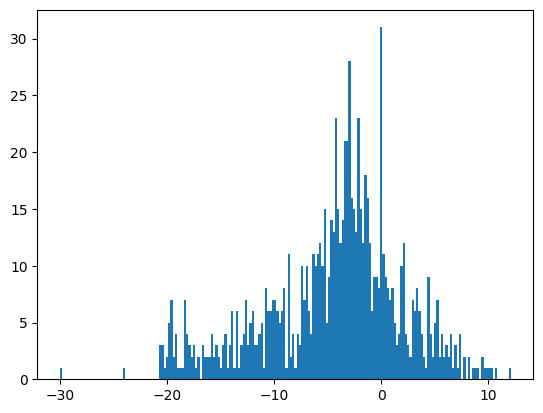

In [52]:
plt.hist(skewness,bins = 200)

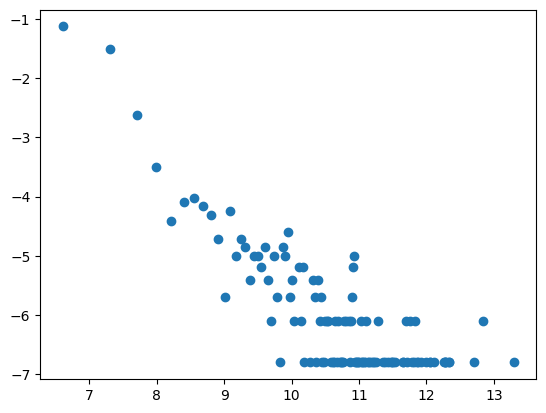

In [58]:
plt.scatter(np.log(bars),np.log(hist))
plt.show()

Coeficiente de determinação (R^2): 0.911905555590631
Intercepto (b0): 9.923691612550845
Coeficiente (b1): -1.6474385276867705


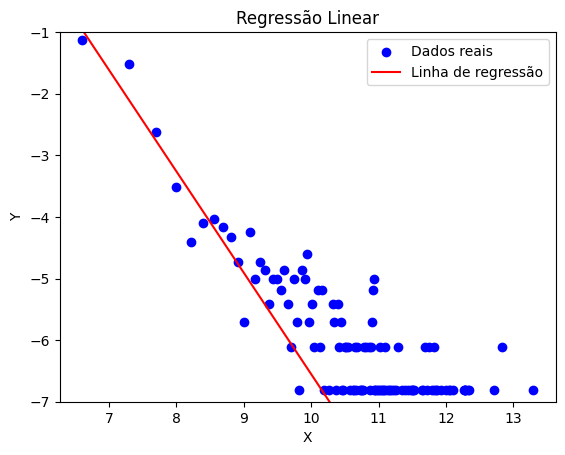

In [42]:
from sklearn.linear_model import LinearRegression

x = np.log(bars)  # Reshape para formato 2D necessário para scikit-learn
y = np.log(hist)

y_ = y[x<9]
x_ = x[x<9]
x_ = x_.reshape(-1,1)
model = LinearRegression()  # Criação do modelo
model.fit(x_, y_)  # Ajuste do modelo aos dados
r_sq = model.score(x_, y_)
y_pred = model.predict(x.reshape(-1,1))

print(f"Coeficiente de determinação (R^2): {r_sq}")
print(f"Intercepto (b0): {model.intercept_}")
print(f"Coeficiente (b1): {model.coef_[0]}")

plt.scatter(x, y, color='blue', label='Dados reais')
plt.plot(x, y_pred, color='red', label='Linha de regressão')
plt.title('Regressão Linear')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-7,-1)
plt.legend()
plt.show()

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          2.,   2.,   2.,   1.,   1.,   0.,   0.,   3.,   4.,   0.,   2.,
          6.,   2.,   5.,   2.,   6., 

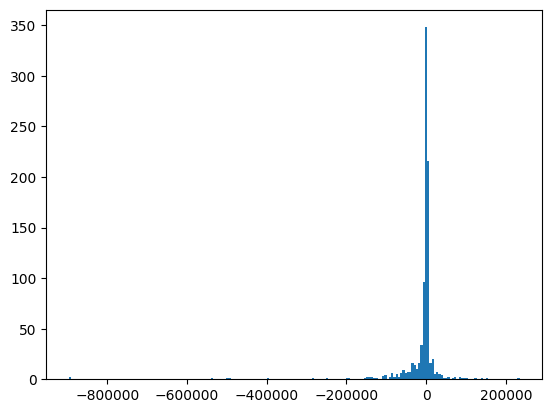

In [6]:
plt.hist(data[1],bins = 200)